In [1]:
######### importing all required libraries for explortory data analysis


%matplotlib inline
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
######### Importing all required libraries for developing Naive Baye Model for text classification


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
######## selected categories according to given task and removed headers and footers and quotes

categories = ['sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast']

data = fetch_20newsgroups(categories=categories, remove=('headers', 'footers', 'quotes'))
data.target_names

['sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast']

In [4]:
####### transformed our dataset into dataframe for handling dataset easily

data_df = pd.DataFrame([data.data, data.target.tolist()]).T
data_df.columns = ['text', 'target']

targets = pd.DataFrame(data.target_names)
targets.columns=['title']

news_data = pd.merge(data_df, targets, left_on='target', right_index=True)

In [5]:
####### checking dataset value present any null value

news_data.isnull().any()

text      False
target    False
title     False
dtype: bool

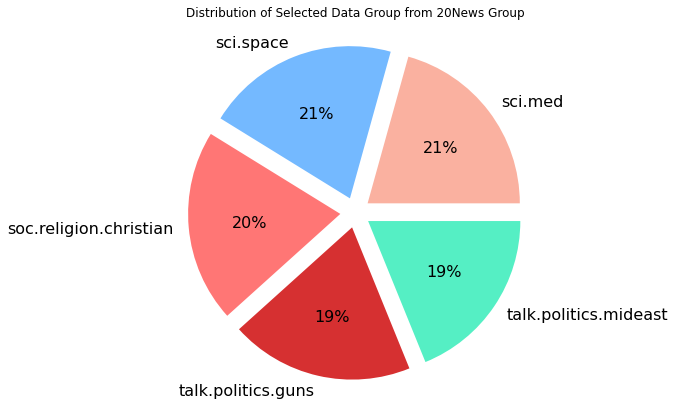

In [6]:
####### ploted a pie chart to show distribution of our dataset


size = news_data.target.value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
custom_colors = ['#fab1a0', '#74b9ff', '#ff7675', '#d63031', '#55efc4']



plt.figure(figsize=(7,7))
plt.pie(size, autopct='%1.0f%%', explode=explode, labels=categories, textprops={'fontsize' : 16}, colors=custom_colors)
plt.title("Distribution of Selected Data Group from 20News Group")
plt.show()

In [7]:
####### converting our dataset in matrix of token count and removed stopwords of english and convert all words into lowercase


vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features=10000)

In [8]:
###### matrix of words

all_features = vectorizer.fit_transform(news_data.text)

In [9]:
###### token and size of matrix


all_features.shape

(2896, 10000)

In [10]:
###### words and there mapping term

vectorizer.vocabulary_

{'sure': 8866,
 'proper': 7159,
 'group': 4125,
 'post': 6915,
 'goes': 4028,
 'years': 9960,
 'ago': 630,
 'mother': 5976,
 'diagnosed': 2775,
 'having': 4243,
 'cancer': 1616,
 'lymph': 5524,
 'arms': 929,
 'doctors': 2931,
 'removed': 7600,
 'area': 893,
 'movement': 5999,
 'arm': 918,
 'slight': 8394,
 'moved': 5998,
 'course': 2371,
 'got': 4048,
 'severe': 8203,
 'complaining': 2062,
 'produced': 7104,
 'explanation': 3475,
 'tissue': 9171,
 'causing': 1700,
 'pain': 6537,
 'time': 9159,
 'doctor': 2929,
 'suggested': 8811,
 'employed': 3194,
 'break': 1477,
 'attending': 1068,
 'therapy': 9097,
 'sessions': 8187,
 'damage': 2510,
 'occured': 6321,
 'nerve': 6148,
 'caused': 1698,
 'level': 5340,
 'permanently': 6693,
 'increase': 4626,
 'severly': 8205,
 'controlled': 2277,
 'tylenol': 9387,
 'loss': 5482,
 'use': 9532,
 'wrist': 9930,
 'outward': 6490,
 'great': 4098,
 'looked': 5469,
 'issue': 4932,
 'discovered': 2855,
 'tumor': 9363,
 'grown': 4129,
 'decreased': 2598,
 'exa

In [11]:
####### split dataset into training and test where test is 20% of dataset


x_train, x_test, y_train, y_test = train_test_split(all_features, data.target, test_size = 0.20, random_state=20)

In [12]:
######## fitting datapoints in sklearn model


classifier = MultinomialNB(alpha=2.7, fit_prior=False)

classifier.fit(x_train, y_train)

MultinomialNB(alpha=2.7, fit_prior=False)

In [13]:
######## model score, performance

classifier.score(x_test, y_test)

0.2293103448275862

In [14]:
nr_correct = (y_test == classifier.predict(x_test)).sum()

print(f'{nr_correct} documents classified correctly')

133 documents classified correctly


In [15]:
nr_incorrect = y_test.size - nr_correct

print(f'Number of documents incorrectly classified is {nr_incorrect}')

Number of documents incorrectly classified is 447


In [16]:
####### plotting confusion matrix to see true positive and false negative

pred = classifier.predict(x_test)

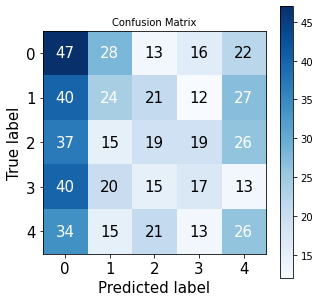

In [17]:
#!pip install scikit-plot

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred, figsize=(5,5), title_fontsize=(10), text_fontsize=(15))
plt.show()

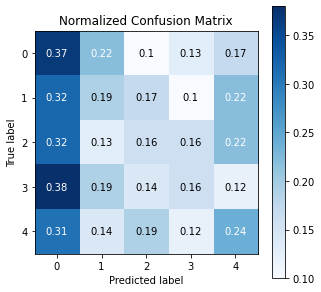

In [22]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True, figsize=(5, 5))
plt.show()

In [19]:
####### classification report


from sklearn.metrics import classification_report

print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.24      0.37      0.29       126
           1       0.24      0.19      0.21       124
           2       0.21      0.16      0.19       116
           3       0.22      0.16      0.19       105
           4       0.23      0.24      0.23       109

    accuracy                           0.23       580
   macro avg       0.23      0.23      0.22       580
weighted avg       0.23      0.23      0.22       580



<function matplotlib.pyplot.show(close=None, block=None)>

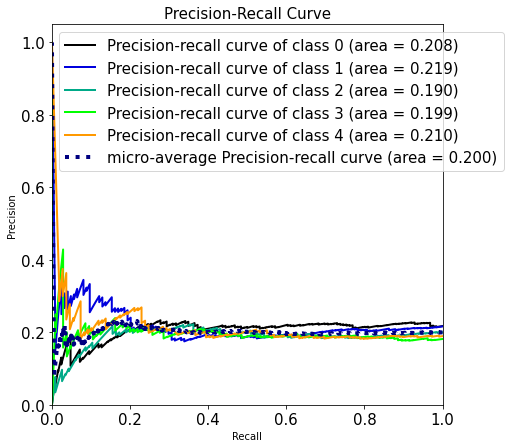

In [23]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(7, 7), title_fontsize=15, text_fontsize=15)
plt.show

In [21]:
example = ['jesus died for people',
           'jesus is christine',
          'dinner with president of usa',
          'new satalite in space launch',
          'new computer with good performance',
          'not all religion Monotheism',
          'welcome to usa president']


doc_to_word_mat = vectorizer.transform(example)
classifier.predict(doc_to_word_mat)

array([4, 4, 2, 1, 4, 4, 2], dtype=int64)